<a href="https://colab.research.google.com/github/hamdi-ridha/Workshop-New-Vision/blob/main/ISETT-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

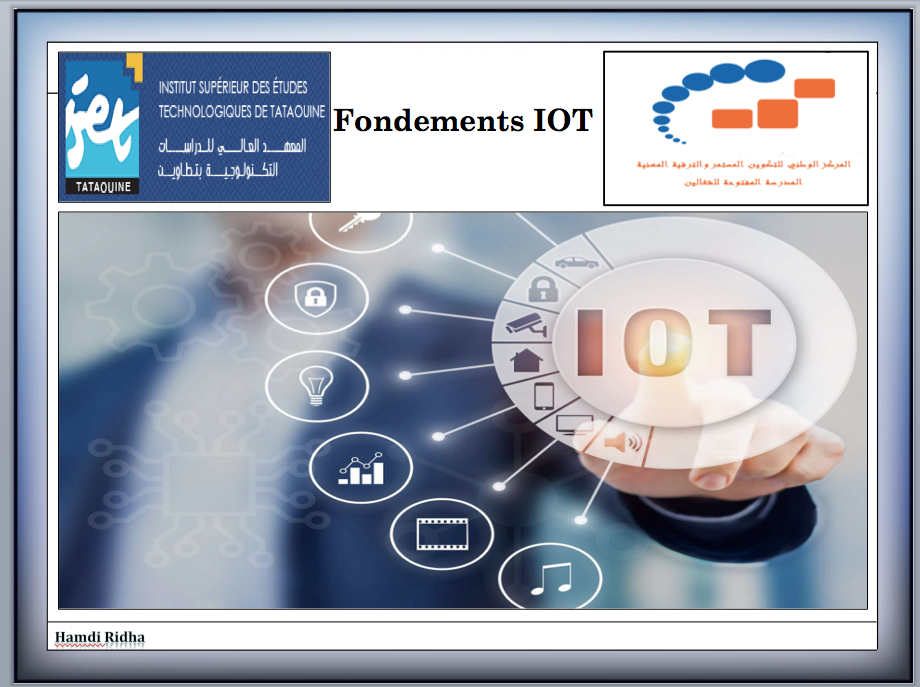


In [1]:
! pip install paho-mqtt

     |████████████████████████████████| 99 kB 3.1 MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=cd001a55586ef6e3a932334b0eacdf9bb00484dabca60c8a2927ecdae542550d
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
Successfully built paho-mqtt


In [3]:
import paho.mqtt.client as mqtt
# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("ISETT/LTI2/2022/LOCK")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.connect("broker.mqttdashboard.com", 1883, 60) 
client.publish("ISETT/LTI2/2022/LOCK","please open the door", retain=True)


In [17]:
!pip install opencv-contrib-python
!pip install common
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
 

--2022-03-20 05:10:11--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2022-03-20 05:10:11 (16.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('/content/photo.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
grey = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(test_image, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
     client.connect("broker.mqttdashboard.com", 1883, 60) 
     client.publish("ISETT/LTI2/2022/LOCK","please open the door", retain=True)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))